<a href="https://colab.research.google.com/github/aryangovindrao/Portfolio/blob/main/house_prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
df = pd.read_csv("/train.csv")
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [4]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df.isnull().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [29]:
import pandas as pd
df.describe()

,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,GarageArea,Neighborhood,YearBuilt,YearRemodAdd,FullBath,KitchenQual,ExterQual,CentralAir,LotArea,SalePrice
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1460.000000,1.460000e+03,1.460000e+03,1.460000e+03,1460.000000,1460.000000,1460.000000,1.460000e+03,1460.000000
mean,1.387018e-16,-1.277517e-16,2.457699e-16,1.216683e-16,-1.216683e-17,12.251370,1.046347e-15,4.496860e-15,1.180182e-16,2.339726,2.539726,0.934932,-5.840077e-17,180921.195890
std,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,6.013735,1.000343e+00,1.000343e+00,1.000343e+00,0.830161,0.693995,0.246731,1.000343e+00,79442.502883
min,-3.688413e+00,-2.249120e+00,-2.411167e+00,-2.365440e+00,-2.212963e+00,0.000000,-3.287824e+00,-1.689368e+00,-2.841822e+00,0.000000,0.000000,0.000000,-9.237292e-01,34900.000000
25%,-7.951515e-01,-7.347485e-01,-5.966855e-01,-1.026858e+00,-6.479160e-01,7.000000,-5.719226e-01,-8.656586e-01,-1.026041e+00,2.000000,2.000000,1.000000,-2.969908e-01,129975.000000
50%,-7.183611e-02,-9.797004e-02,-1.503334e-01,3.117246e-01,3.284429e-02,12.000000,5.737148e-02,4.425864e-01,7.897405e-01,3.000000,3.000000,1.000000,-1.040633e-01,163000.000000
75%,6.514792e-01,4.974036e-01,5.491227e-01,3.117246e-01,4.820057e-01,17.000000,9.516316e-01,9.271216e-01,7.897405e-01,3.000000,3.000000,1.000000,1.087080e-01,214000.000000
max,2.821425e+00,7.855574e+00,1.152095e+01,2.988889e+00,4.421526e+00,24.000000,1.282839e+00,1.217843e+00,2.605522e+00,3.000000,3.000000,1.000000,2.051827e+01,755000.000000


In [8]:
column_null_percentage = (df.isnull().sum() / len(df)) * 100
print(column_null_percentage)

Id                0.000000
MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
                   ...    
MoSold            0.000000
YrSold            0.000000
SaleType          0.000000
SaleCondition     0.000000
SalePrice         0.000000
Length: 81, dtype: float64


In [11]:
columns_to_keep = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'GarageArea', 'Neighborhood', 'YearBuilt', 'YearRemodAdd', 'FullBath', 'KitchenQual', 'ExterQual', 'CentralAir', 'LotArea', 'SalePrice']
df = df[columns_to_keep]

print(f'Shape of the DataFrame after keeping specified columns: {df.shape}')
print('First 5 rows of the modified DataFrame:')
display(df.head())

Shape of the DataFrame after keeping specified columns: (1460, 14)
First 5 rows of the modified DataFrame:


,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,GarageArea,Neighborhood,YearBuilt,YearRemodAdd,FullBath,KitchenQual,ExterQual,CentralAir,LotArea,SalePrice
0,7,1710,856,2,548,CollgCr,2003,2003,2,Gd,Gd,Y,8450,208500
1,6,1262,1262,2,460,Veenker,1976,1976,2,TA,TA,Y,9600,181500
2,7,1786,920,2,608,CollgCr,2001,2002,2,Gd,Gd,Y,11250,223500
3,7,1717,756,3,642,Crawfor,1915,1970,1,Gd,TA,Y,9550,140000
4,8,2198,1145,3,836,NoRidge,2000,2000,2,Gd,Gd,Y,14260,250000


In [9]:
columns_to_drop = column_null_percentage[column_null_percentage > 50].index.tolist()
num_columns_removed = len(columns_to_drop)
df.drop(columns=columns_to_drop, inplace=True)

print(f'Number of columns removed: {num_columns_removed}')

Number of columns removed: 5


In [10]:
print(f'Shape of the modified DataFrame: {df.shape}')

Shape of the modified DataFrame: (1460, 76)


## Summary:

### Q&A
*   **What is the number of columns removed due to high missing values?**
    5 columns were removed because more than 50% of their values were missing.
*   **What is the shape of the modified DataFrame?**
    The modified DataFrame has a shape of (1460, 76), meaning it has 1460 rows and 76 columns.

### Data Analysis Key Findings
*   The initial analysis identified the percentage of missing values for each column; for instance, `LotFrontage` had 17.74% missing values.
*   5 columns were found to have more than 50% missing values.
*   These 5 columns were subsequently removed from the DataFrame.
*   After the removal, the DataFrame's dimensions changed from an initial 81 columns to 76 columns.

### Insights or Next Steps
*   Further investigation is needed to determine appropriate imputation strategies for the remaining missing values in the 76 columns, or to decide if those columns should also be removed if a lower missingness threshold is deemed necessary.
*   The dataset is now significantly cleaner from a missing data perspective, and the next steps could involve feature engineering or model training on this refined dataset.


In [12]:
df.columns

Index(['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'GarageArea',
       'Neighborhood', 'YearBuilt', 'YearRemodAdd', 'FullBath', 'KitchenQual',
       'ExterQual', 'CentralAir', 'LotArea', 'SalePrice'],
      dtype='object')

In [13]:
df.isnull().sum()

,0
OverallQual,0
GrLivArea,0
TotalBsmtSF,0
GarageCars,0
GarageArea,0
Neighborhood,0
YearBuilt,0
YearRemodAdd,0
FullBath,0
KitchenQual,0


In [15]:
df.dtypes

,0
OverallQual,int64
GrLivArea,int64
TotalBsmtSF,int64
GarageCars,int64
GarageArea,int64
Neighborhood,object
YearBuilt,int64
YearRemodAdd,int64
FullBath,int64
KitchenQual,object


In [16]:
df.head()

,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,GarageArea,Neighborhood,YearBuilt,YearRemodAdd,FullBath,KitchenQual,ExterQual,CentralAir,LotArea,SalePrice
0,7,1710,856,2,548,CollgCr,2003,2003,2,Gd,Gd,Y,8450,208500
1,6,1262,1262,2,460,Veenker,1976,1976,2,TA,TA,Y,9600,181500
2,7,1786,920,2,608,CollgCr,2001,2002,2,Gd,Gd,Y,11250,223500
3,7,1717,756,3,642,Crawfor,1915,1970,1,Gd,TA,Y,9550,140000
4,8,2198,1145,3,836,NoRidge,2000,2000,2,Gd,Gd,Y,14260,250000


In [18]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['Neighborhood'] = lb.fit_transform(df['Neighborhood'])
df['KitchenQual'] = lb.fit_transform(df['KitchenQual'])
df['ExterQual'] = lb.fit_transform(df['ExterQual'])
df['CentralAir'] = lb.fit_transform(df['CentralAir'])
print(df.head())

   OverallQual  GrLivArea  TotalBsmtSF  GarageCars  GarageArea  Neighborhood  \
0            7       1710          856           2         548             5   
1            6       1262         1262           2         460            24   
2            7       1786          920           2         608             5   
3            7       1717          756           3         642             6   
4            8       2198         1145           3         836            15   

   YearBuilt  YearRemodAdd  FullBath  KitchenQual  ExterQual  CentralAir  \
0       2003          2003         2            2          2           1   
1       1976          1976         2            3          3           1   
2       2001          2002         2            2          2           1   
3       1915          1970         1            2          3           1   
4       2000          2000         2            2          2           1   

   LotArea  SalePrice  
0     8450     208500  
1     9600    

**Reasoning**:
To prepare the numerical features for machine learning models, I will apply `StandardScaler`. This will standardize the features by removing the mean and scaling to unit variance, which is a common practice for many algorithms.

First, I'll identify the numerical columns (excluding the target `SalePrice` and the already encoded categorical features for this step). Then, I'll initialize the `StandardScaler` and apply it to these selected columns.

In [19]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns to scale (excluding the target 'SalePrice' and already encoded categoricals)
numerical_cols_to_scale = ['OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars', 'GarageArea', 'YearBuilt', 'YearRemodAdd', 'FullBath', 'LotArea']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply scaling to the selected numerical columns
df[numerical_cols_to_scale] = scaler.fit_transform(df[numerical_cols_to_scale])

print('First 5 rows of the DataFrame after scaling numerical features:')
display(df.head())

First 5 rows of the DataFrame after scaling numerical features:


,OverallQual,GrLivArea,TotalBsmtSF,GarageCars,GarageArea,Neighborhood,YearBuilt,YearRemodAdd,FullBath,KitchenQual,ExterQual,CentralAir,LotArea,SalePrice
0,0.651479,0.370333,-0.459303,0.311725,0.351000,5,1.050994,0.878668,0.789741,2,2,1,-0.207142,208500
1,-0.071836,-0.482512,0.466465,0.311725,-0.060731,24,0.156734,-0.429577,0.789741,3,3,1,-0.091886,181500
2,0.651479,0.515013,-0.313369,0.311725,0.631726,5,0.984752,0.830215,0.789741,2,2,1,0.073480,223500
3,0.651479,0.383659,-0.687324,1.650307,0.790804,6,-1.863632,-0.720298,-1.026041,2,3,1,-0.096897,140000
4,1.374795,1.299326,0.199680,1.650307,1.698485,15,0.951632,0.733308,0.789741,2,2,1,0.375148,250000


In [21]:
from sklearn.model_selection import train_test_split

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

X_train ,X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print("training data:")
print(X_train.shape)
print(X_train)
print(y_train.shape)
print(y_train)
print("testing data:")
print(X_test.shape)
print(y_test.shape)

training data:
(1168, 13)
      OverallQual  GrLivArea  TotalBsmtSF  GarageCars  GarageArea  \
254     -0.795151  -0.383521     0.585036   -1.026858   -0.837406   
1066    -0.071836   0.105723    -0.589275    0.311725   -0.435032   
638     -0.795151  -1.369623    -0.596115   -2.365440   -2.212963   
799     -0.795151   0.480746    -0.744329   -1.026858   -1.090059   
380     -0.795151   0.334164    -0.071666   -1.026858   -0.771903   
...           ...        ...          ...         ...         ...   
1095    -0.071836  -0.383521     0.585036    0.311725   -0.154306   
1130    -1.518467   0.886229     0.147235    0.311725    0.482006   
1294    -0.795151  -1.240174    -0.441061    0.311725    0.463291   
860      0.651479  -0.170310    -0.331610   -1.026858   -1.202350   
1126     0.651479   0.075264     0.719569    1.650307    0.875022   

      Neighborhood  YearBuilt  YearRemodAdd  FullBath  KitchenQual  ExterQual  \
254             12  -0.472560     -1.350194 -1.026041           

In [22]:
print("training data:")
print(X_train.shape)
# print(X_train)
print(y_train.shape)
# print(y_train)
print("testing data:")
print(X_test.shape)
print(y_test.shape)

training data:
(1168, 13)
(1168,)
testing data:
(292, 13)
(292,)


In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Instantiate models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
gbr_model = GradientBoostingRegressor(random_state=42)

# Train models
lr_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gbr_model.fit(X_train, y_train)

print("Linear Regression model trained.")
print("Random Forest Regressor model trained.")
print("Gradient Boosting Regressor model trained.")

Linear Regression model trained.
Random Forest Regressor model trained.
Gradient Boosting Regressor model trained.


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# --- Evaluate Linear Regression Model ---
lr_predictions = lr_model.predict(X_test)
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
lr_r2 = r2_score(y_test, lr_predictions)

print("Linear Regression Model Performance:")
print(f"  MAE: {lr_mae:.2f}")
print(f"  RMSE: {lr_rmse:.2f}")
print(f"  R-squared: {lr_r2:.2f}")
print("\n")

# --- Evaluate Random Forest Regressor Model ---
rf_predictions = rf_model.predict(X_test)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest Regressor Model Performance:")
print(f"  MAE: {rf_mae:.2f}")
print(f"  RMSE: {rf_rmse:.2f}")
print(f"  R-squared: {rf_r2:.2f}")
print("\n")

# --- Evaluate Gradient Boosting Regressor Model ---
gbr_predictions = gbr_model.predict(X_test)
gbr_mae = mean_absolute_error(y_test, gbr_predictions)
gbr_rmse = np.sqrt(mean_squared_error(y_test, gbr_predictions))
gbr_r2 = r2_score(y_test, gbr_predictions)

print("Gradient Boosting Regressor Model Performance:")
print(f"  MAE: {gbr_mae:.2f}")
print(f"  RMSE: {gbr_rmse:.2f}")
print(f"  R-squared: {gbr_r2:.2f}")

Linear Regression Model Performance:
  MAE: 23560.86
  RMSE: 37291.90
  R-squared: 0.82


Random Forest Regressor Model Performance:
  MAE: 18276.65
  RMSE: 28701.67
  R-squared: 0.89


Gradient Boosting Regressor Model Performance:
  MAE: 18098.61
  RMSE: 27438.92
  R-squared: 0.90


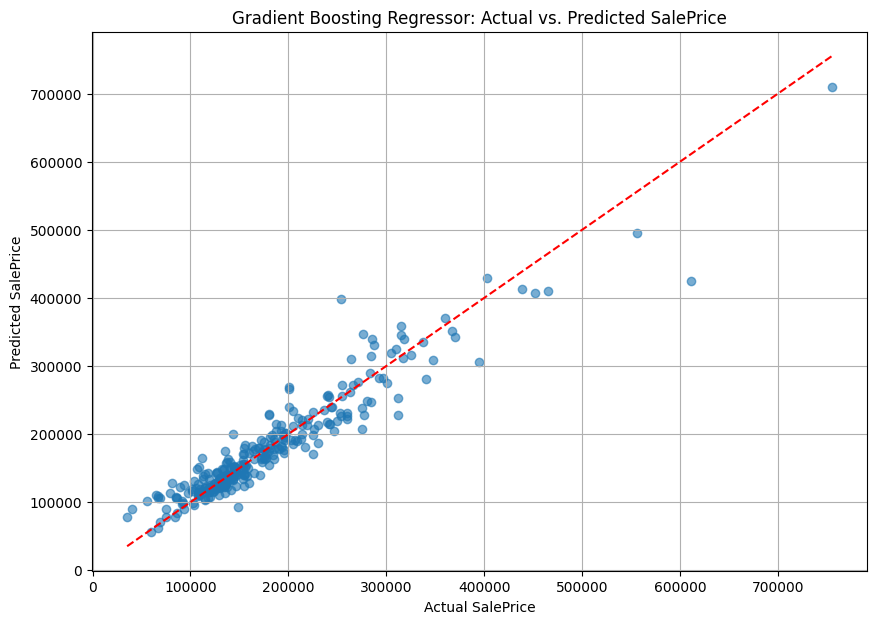

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.scatter(y_test, gbr_predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Gradient Boosting Regressor: Actual vs. Predicted SalePrice')
plt.grid(True)
plt.show()

**Reasoning**:
To create the residual plot, I will first calculate the residuals by subtracting the predicted values from the actual values. Then, I will generate a scatter plot of these residuals against the predicted values, add a horizontal line at y=0 for reference, and label the axes and title the plot for clarity.



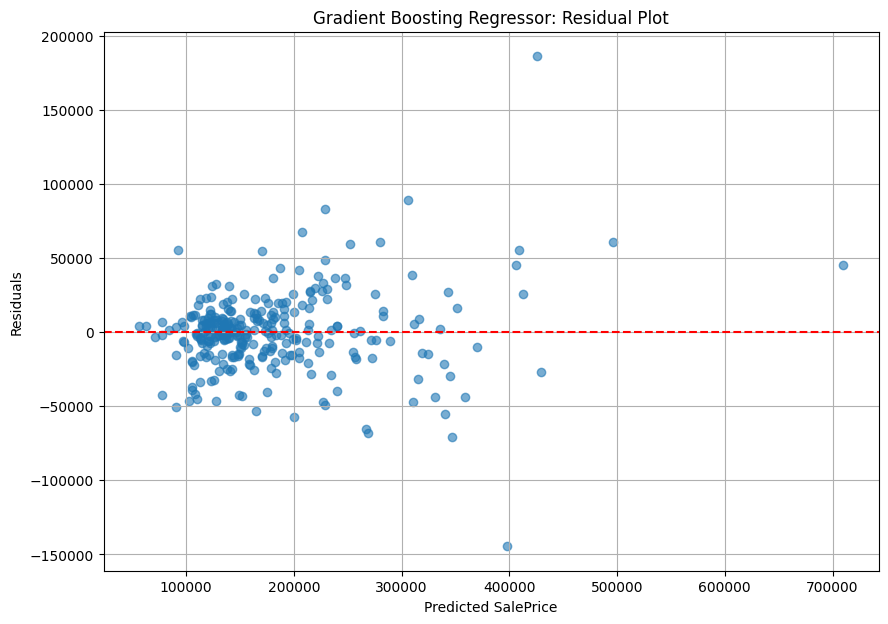

In [26]:
residuals = y_test - gbr_predictions

plt.figure(figsize=(10, 7))
plt.scatter(gbr_predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted SalePrice')
plt.ylabel('Residuals')
plt.title('Gradient Boosting Regressor: Residual Plot')
plt.grid(True)
plt.show()

**Reasoning**:
To further analyze the distribution of the residuals, I will create a histogram of the calculated residuals. This will help in understanding if the errors are normally distributed around zero, which is a desirable characteristic for a good model.



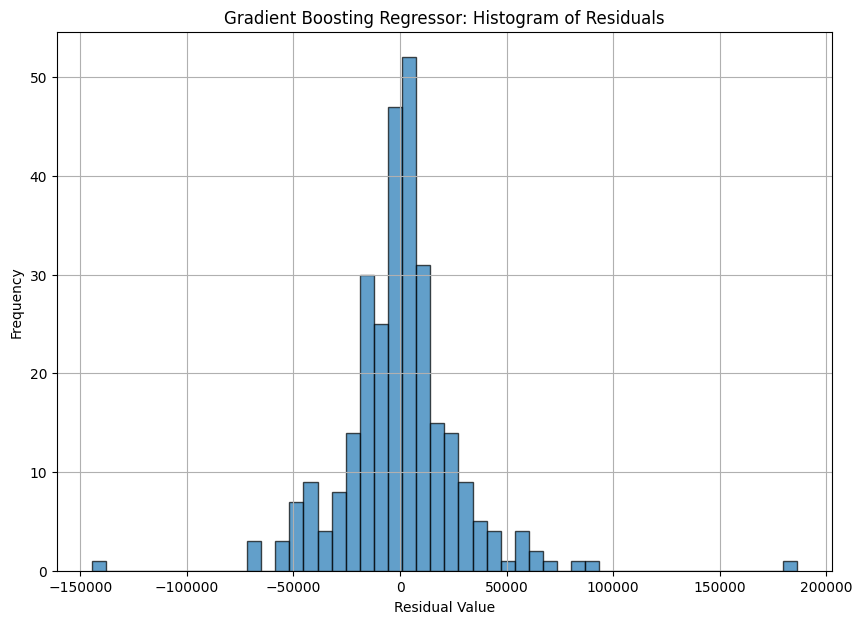

In [27]:
plt.figure(figsize=(10, 7))
plt.hist(residuals, bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.title('Gradient Boosting Regressor: Histogram of Residuals')
plt.grid(True)
plt.show()

## Final Result: Comprehensive Summary of Gradient Boosting Regressor Analysis

### Model Performance Insights:

*   **R-squared (0.90):** The Gradient Boosting Regressor achieved an R-squared value of 0.90, indicating that approximately 90% of the variance in the `SalePrice` can be explained by the independent variables in the model. This suggests a strong fit.
*   **MAE (18098.61) and RMSE (27438.92):** The Mean Absolute Error and Root Mean Squared Error are relatively low given the scale of `SalePrice`, suggesting that the model's predictions are, on average, close to the actual values.

### Residual Analysis:

*   **Residual Plot (Predicted vs. Residuals):**
    *   The residual plot shows a relatively random scatter of points around the horizontal line at y=0, which is generally a good sign. This indicates that the model is not systematically over- or under-predicting across the range of predicted values.
    *   There doesn't appear to be a clear pattern (e.g., a cone shape, a curve) in the residuals, suggesting that the homoscedasticity assumption (constant variance of errors) might be reasonably met for most predictions.
    *   However, for higher predicted `SalePrice` values (above approximately $400,000), there seems to be more spread in the residuals, indicating that the model might struggle more with predicting very high-priced homes. There are a few noticeable outliers where the model significantly underpredicts high values or overpredicts relatively lower values.

*   **Histogram of Residuals:**
    *   The histogram of residuals shows a distribution that is somewhat bell-shaped and centered around zero, which is desirable. This suggests that the errors are mostly random and normally distributed.
    *   There might be a slight positive skew, with a longer tail towards positive residuals (actual > predicted), which could indicate that the model slightly underpredicts some values.
    *   The presence of a few residuals at the extreme ends (e.g., around -150,000 and +180,000) corresponds to the outliers observed in the residual plot, indicating some instances where the model's predictions deviate significantly from the actual values.

### Overall Conclusion:

The Gradient Boosting Regressor appears to be a robust model for predicting `SalePrice`, explaining a high proportion of variance and exhibiting generally well-behaved residuals. However, further investigation into the data points corresponding to large residuals, especially for higher-priced homes, could help in identifying potential areas for model improvement or feature engineering. The model shows good predictive capability but could benefit from handling outliers or non-linear relationships at the extremes of the `SalePrice` range more effectively.